In [1]:
import os 
import numpy as np 
import pandas as pd
from scipy.special import softmax 
import pingouin as pg 

%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt 
import seaborn as sns 

#from utils.env import frozen_lake
import sys
sys.path.append('..')
from utils.viz import viz
from utils.model import *
from utils.env_fn import *
viz.get_style()

In [2]:
model = wrapper(ecPG, setsize_task)

In [3]:
fname = '../data/collins_12.pkl'
with open(fname, 'rb') as f: data = pickle.load(f)
sub_lst = data.keys()
params = [0, 1, .2, 1.2]
rng = np.random.RandomState(2025)
sim_data = []
for sub_id in sub_lst:
    task = data[sub_id]
    sim_datum = model.sim(task, params, rng)
    sim_data.append(sim_datum)
sim_data = pd.concat(sim_data, ignore_index=True)
sim_data.head()

,sub_id,block_id,block_type,s,repetitions,cor_a,stage,a_ava,a,acc,r,confidence,i_SZ
0,sub-001,1.0,2.0,0.0,1.0,1.0,train,"[0,1,2]",0.0,0.333333,0.0,-0.000000e+00,0.693145
1,sub-001,1.0,2.0,0.0,2.0,1.0,train,"[0,1,2]",2.0,0.379408,0.0,-0.000000e+00,0.693145
2,sub-001,1.0,2.0,1.0,1.0,2.0,train,"[0,1,2]",2.0,0.333333,1.0,4.552290e-08,0.693145
3,sub-001,1.0,2.0,0.0,3.0,1.0,train,"[0,1,2]",1.0,0.456818,1.0,2.454015e-01,0.693145
4,sub-001,1.0,2.0,1.0,2.0,2.0,train,"[0,1,2]",1.0,0.440262,0.0,-1.069283e-01,0.693145


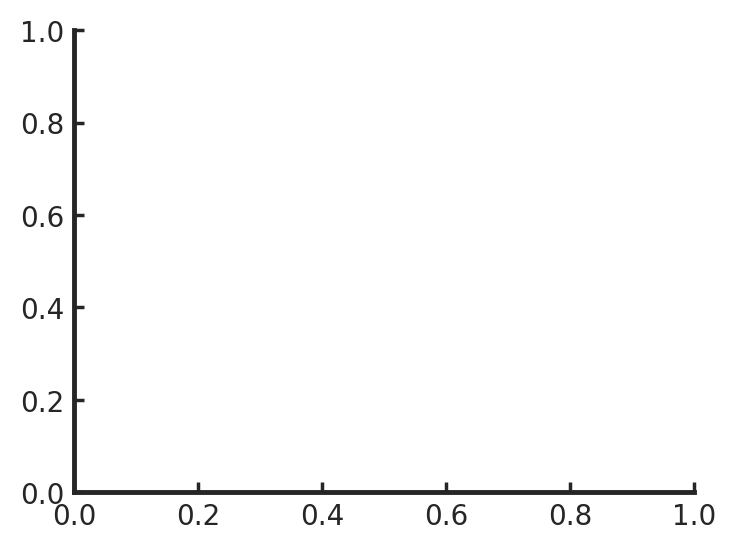

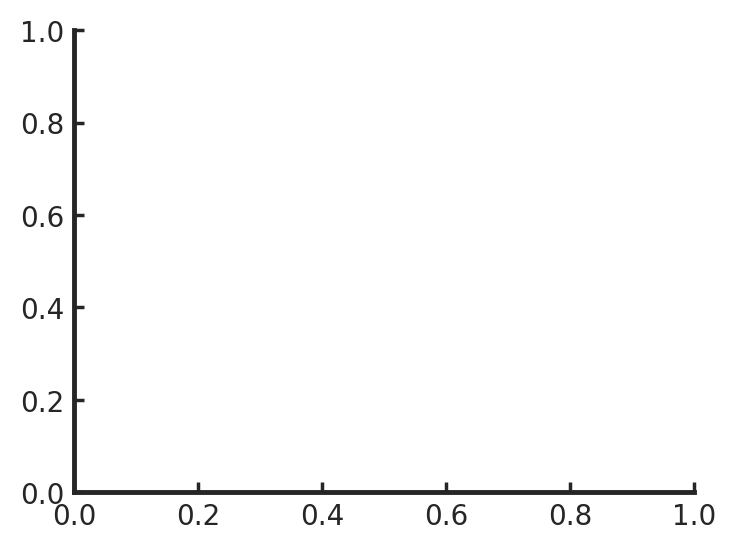

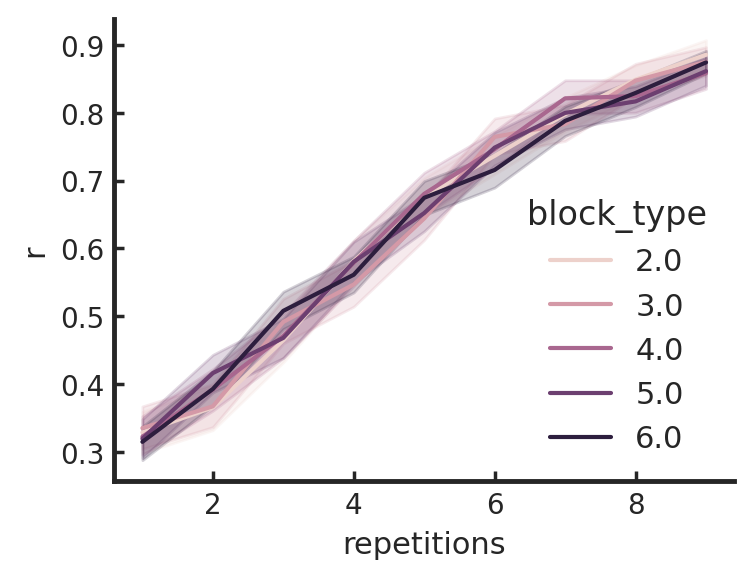

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sns.lineplot(x='repetitions', y='r', data=sim_data.query('repetitions<10'), 
             errorbar=('ci', 95), #err_style='bars', err_kws={'capsize': 3},
             hue='block_type', 
             ax=ax)
plt.show()